<a href="https://colab.research.google.com/github/jazumb/cs480student/blob/main/Copy_of_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

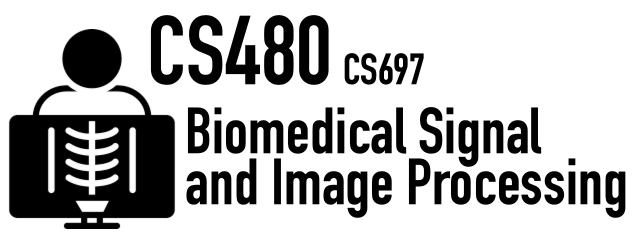
#Assignment 5

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [ ]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# we are using pydicom, so lets install it!
!pip install pydicom

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
# TODO: 220 slices.

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

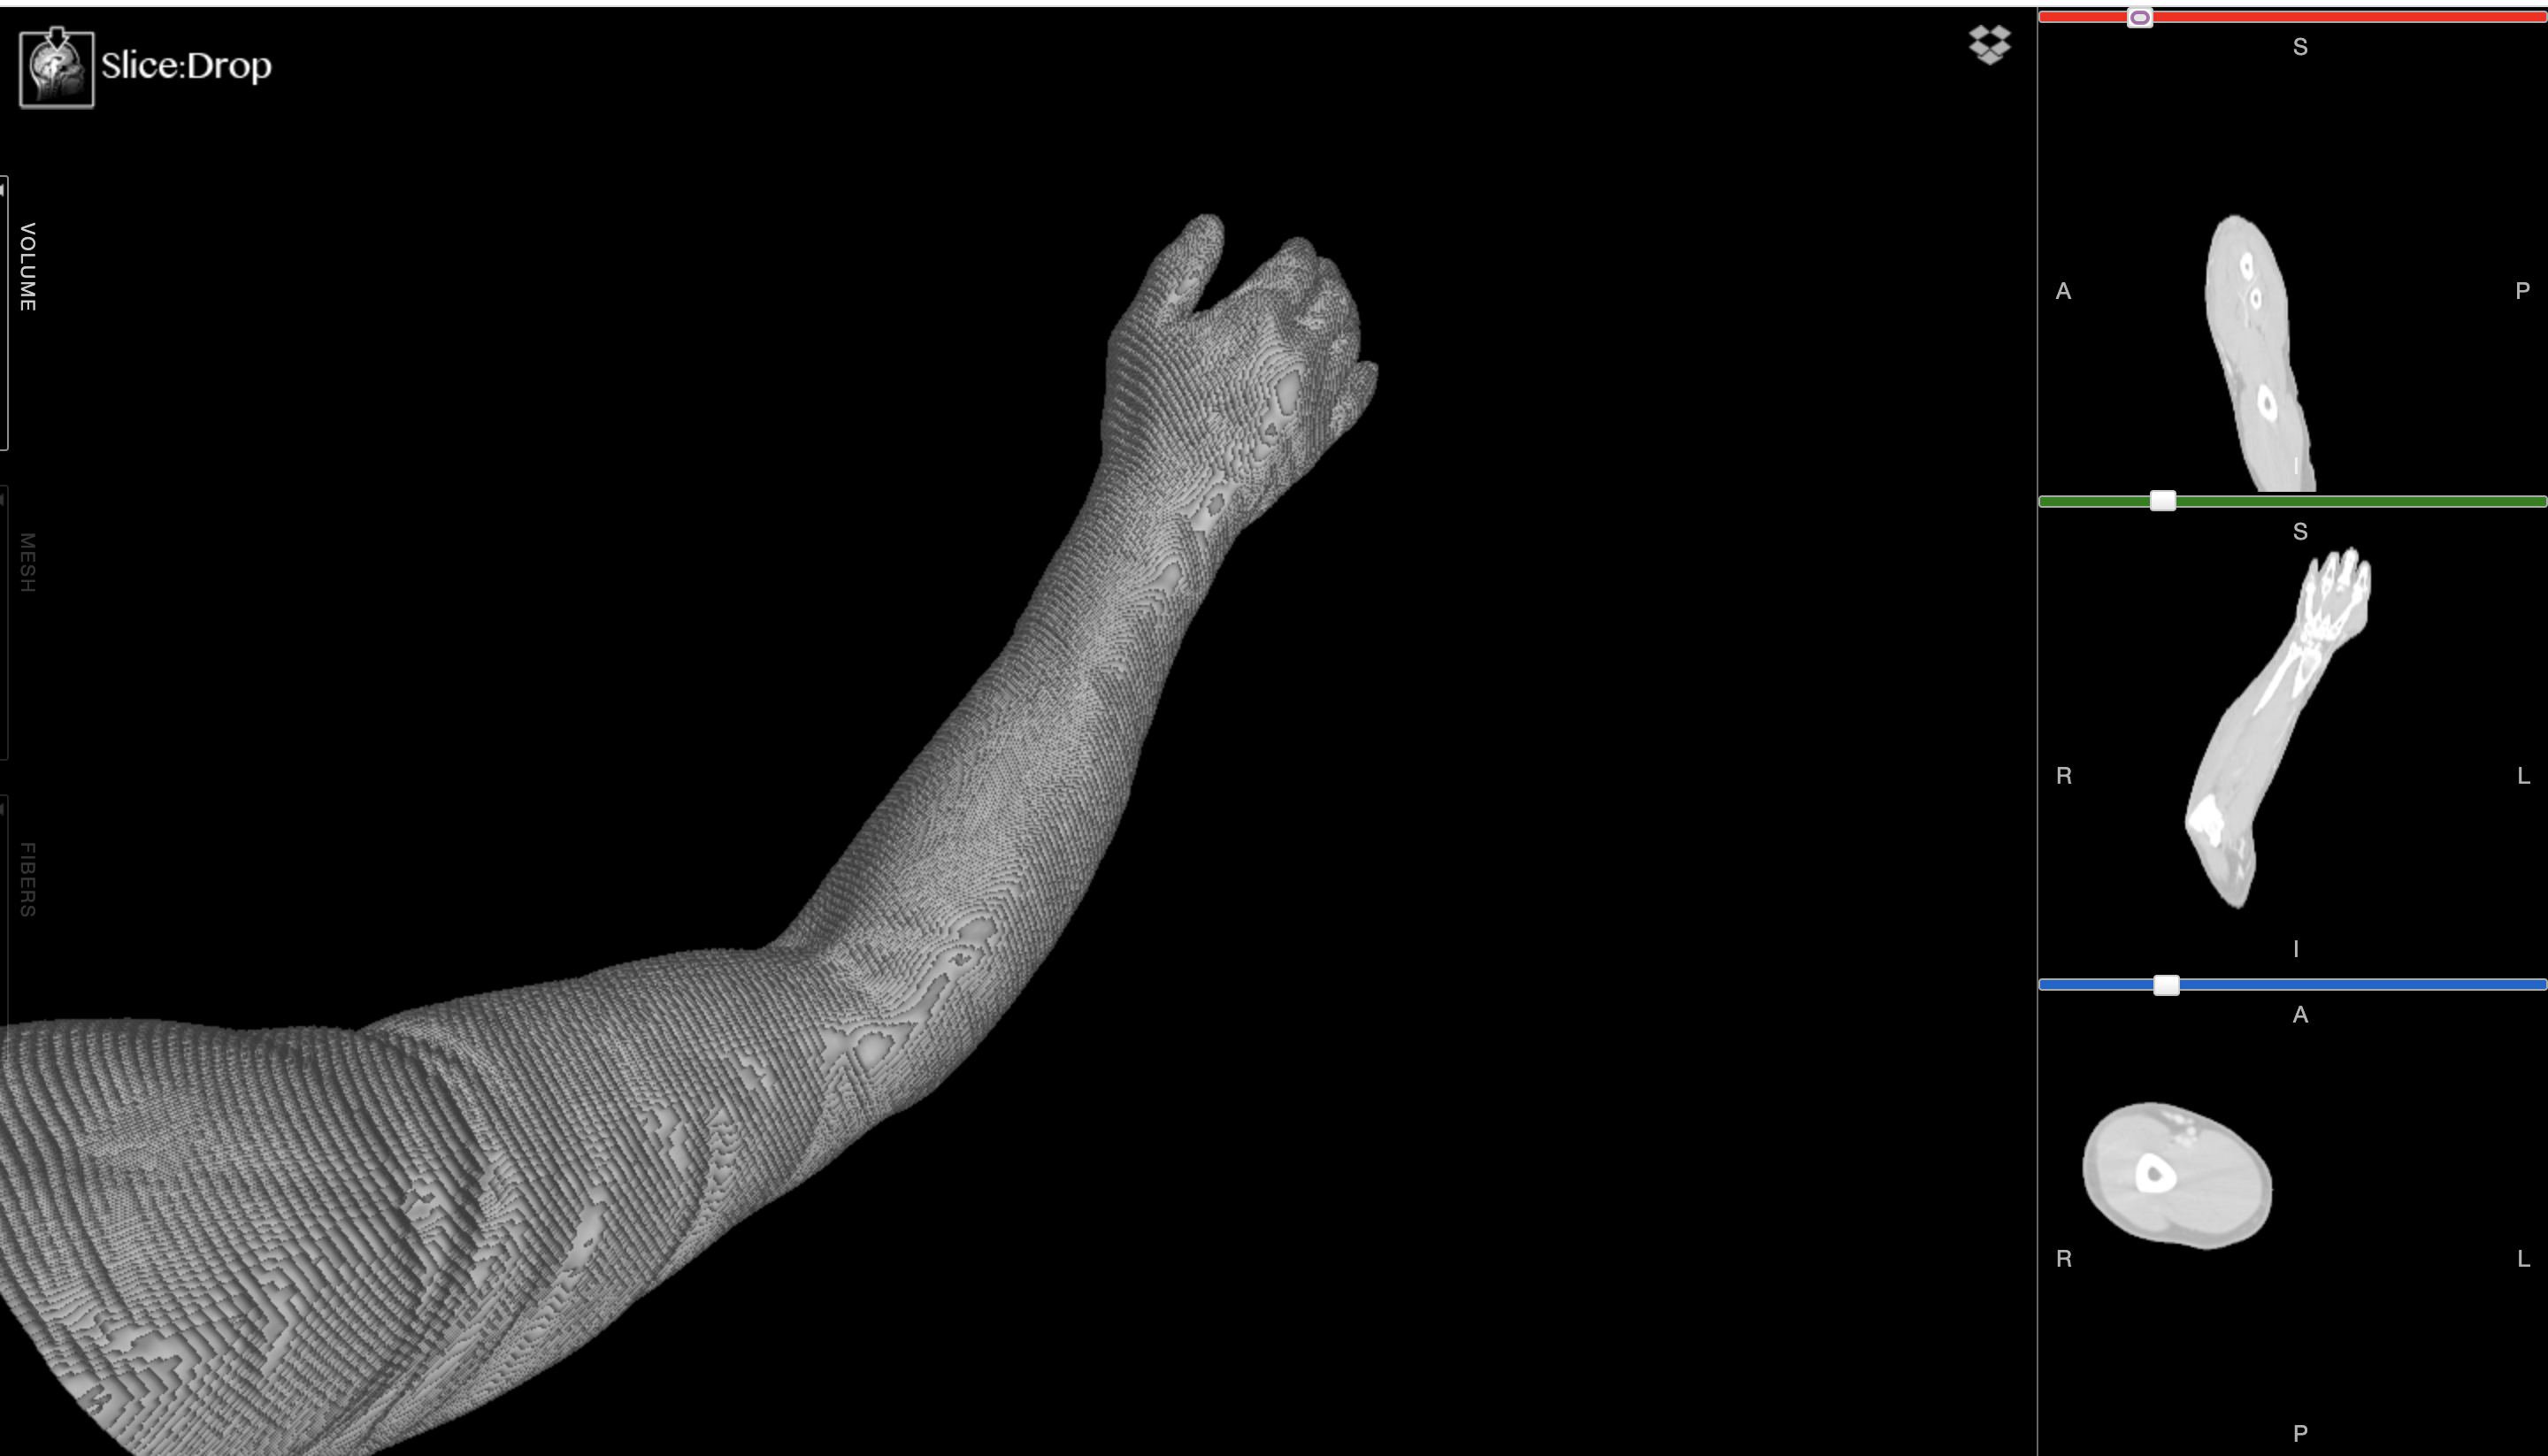

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [ ]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [ ]:
from pydicom import dcmread
import os

In [ ]:
files=(sorted(os.listdir("ct")))


slice = [dcmread("ct/" + files[i])
for i in range(len(files))]

shape=list(slice[0].pixel_array.shape)
shape.append(len(slice))
volume=numpy.zeros(shape)

for i, slice in enumerate(slices):
  image=slice.pixel_array
  volume[:, :, i]=image

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

In [ ]:
# TODO: YOUR CODE FOR AXIAL

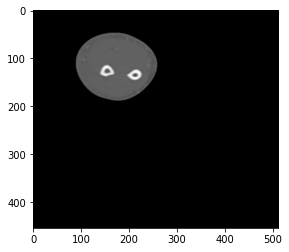

In [ ]:
AXIAL = plt.imshow(volume[:, :, 100], cmap='gray')

In [ ]:
# TODO: YOUR CODE FOR SAGITTAL

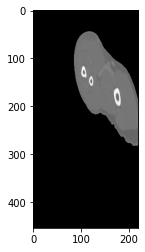

In [ ]:
SAG = plt.imshow(volume[:, 140, :], cmap='Greys_r')

In [ ]:
# TODO: YOUR CODE FOR CORONAL

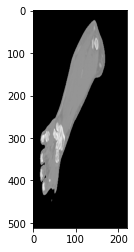

In [ ]:
COR = plt.imshow(volume[98, :, :], cmap='Greys_r')


**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [ ]:
# TODO: YOUR CODE

(0028, 1050) Window Center                       DS: "30.0"
(0028, 1051) Window Width                        DS: "410.0"
(0028, 1052) Rescale Intercept                   DS: "-1024.0"
(0028, 1053) Rescale Slope                       DS: "1.0"


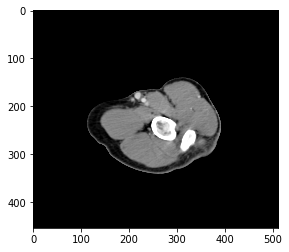

In [ ]:
image = dcmread("ct/" + "IM-0001-0110.dcm")
print(image[0x0028, 0x1050])
print(image[0x0028, 0x1051])
print(image[0x0028, 0x1052])
print(image[0x0028, 0x1053])

pixels=slice.pixel_array
hu_pixels=slice.pixel_array

window=400
level=100
vmax=level + window/2
vmin=level - window/2
plt.imshow(hu_pixels - 1000.0, cmap='Greys_r', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

In [ ]:
# TODO: YOUR CODE

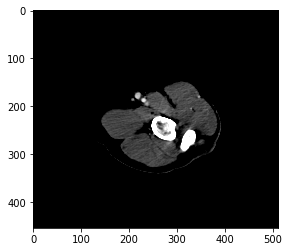

In [ ]:
pixels=slice.pixel_array
hu_pixels= slice.pixel_array

level=100
window=200
vmin=level - window/2
vmax=level + window/2
plt.imshow(hu_pixels - 1024.0, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

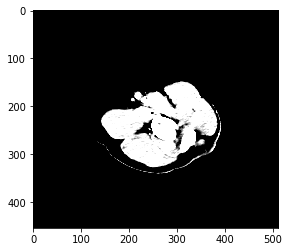

In [ ]:
pixels=slice.pixel_array
hu_pixels=slice.pixel_array

level=20
window=50
vmin=level - window/2
vmax=level + window/2
plt.imshow(hu_pixels - 1024.0, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

To be honest, I'm not really sure what part of the body I'm looking at, but I would say the first values of (400, 100) would be the most logical choice as it shows enough of the surrounding area without singling any part out like the last values do. 
Although, it could depend on what you were hoping to look at for this dicom file, because the last values show a very specific area that could be useful as well.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [ ]:
# TODO: YOUR CODE TO SEGMENT FAT

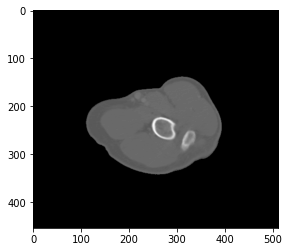

In [ ]:
new_mask = (slice.pixel_array).astype(int16)
new_mask[new_mask < 100] = 0
plt.imshow(new_mask,cmap='gray')

In [ ]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

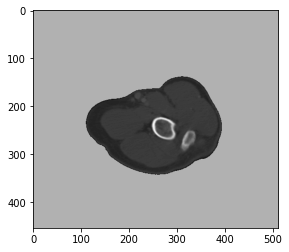

In [ ]:
new_mask = (slice.pixel_array).astype(int16)
new_mask[new_mask < 200] = 2000
plt.imshow(new_mask,cmap='gray')

In [ ]:
# TODO: YOUR CODE TO SEGMENT BONES

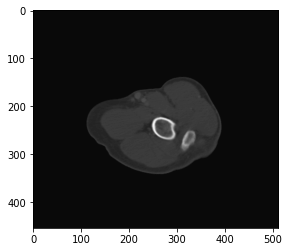

In [ ]:
new_mask = (slice.pixel_array).astype(int16)
new_mask[new_mask < 140] = 0
new_mask[new_mask < 500] = 700
plt.imshow(new_mask,cmap='gray')

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

I played around with different values trying to segment soft tissue, but I couldn't really do it right. For the others, I did better but not quite there. 

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""